<a href="https://colab.research.google.com/github/JoshuaHaga/Covid_19_sprint_1_buildwk/blob/master/Covid_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Must run cell below to load data ###

In [7]:
!pip install kaggle
api_token = {"username":"joshuahaga","key":"87df8709f871bde773c95883204fc54f"}
import json
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!kaggle datasets download -d sudalairajkumar/covid19-in-usa
!unzip '/content/covid19-in-usa.zip'

FileNotFoundError: ignored

##COVID-19 in USA

#Context
Data is obtained from COVID-19 Tracking project and NYTimes. Sincere thanks to them for making it available to the public.

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from 50 US states and the District of Columbia at daily level.

The Original Dataset can be found on kaggle by clicking [here](https://www.kaggle.com/sudalairajkumar/covid19-in-usa).

#Index
All datasets, functions, libraries, and variables used throughout the notebook  will be outlined here. 

###Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy import linalg

###Datasets

In [6]:
### These 3 dataframes come from the kaggle dataset 'COVID-19 in USA'
counties = pd.read_csv('/content/us_counties_covid19_daily.csv')
states   = pd.read_csv('/content/us_states_covid19_daily.csv')
us       = pd.read_csv('/content/us_covid19_daily.csv')

FileNotFoundError: ignored

###Functions

In [34]:
### Checks for null values. 
def null_check(dataframe):
    val = dataframe.isnull().sum()
    val_sum = val.sum()
    if val_sum == 0:
      print('Zero null values.')
    else:
      print(val)

### Finds null counts, shape, describes and previews data set. 
def explore(dataframe):
  print(null_check(dataframe))
  print('Shape: ', dataframe.shape)
  print(dataframe.describe())
  return dataframe.head()

### Creates a list from column names
def col_list(dataframe):
  val_counts = dataframe.value_counts()
  val_as_pd  = pd.DataFrame(val_counts).T
  val_list   = val_as_pd.columns.tolist()
  return val_list

### Calculates daily averages of new cases for counties. Outputs as pandas df
def cnty_daily_avg(dataframe, countyname):
  county = dataframe[dataframe['county']==countyname]
  mean   = county['cases'].mean()
  avg    = mean/len(county)
  dat    = [countyname,avg]
  return dat

###Applies county daily average function across dataframe from a list. 
def daily_df(dataframe, countylist,):
  data_list = []
  for i in countylist:
    data_list.append(cnty_daily_avg(dataframe, i)) 
  return pd.DataFrame(data_list, columns=['county','daily_avg'])

###Creates a dataframe of daily averages for any state. 
def prep_counties(df, state):
  state = df[df['state']==state]
  county_names = col_list(state['county']) 
  ste = state[state['county']=='Baltimore']
  state_daily_avg = daily_df(state, county_names,)
  return pd.DataFrame(state_daily_avg, columns=['county','daily_new_avg'])

###Functoin to create percent of positive cases
def pos_to_neg(dataframe):
  for i in dataframe['positive']:
    return dataframe['positive']/dataframe['negative']


###Variables

In [35]:

################################################################################
###########################<<---- Maryland ---->>###############################
################################################################################
### md_counties                  #< - - - - - - - - - - - All Counties in MD ###
### md_counties_vc               #< - - - - - Value counts of counties in MD ###
### md_county_names              #< - - - - - - - - - List of counties in MD ###
### baltimore_daily_average      #< - - - - Average of new cases daily in MD ###
### md_daily_avg                 #< - - - This is a dataframe of the average ###
###                              #      number of new cases per day for each ###
###                              #      county in the state of MD.           ###
### md_percentage_pos            #< - - - This is the total percentage of all###
###                              #        tests that were positive           ###

# Data Exploration

### Introduction:
  Here I will. be doing some basic data explorations of the sets listed in the index. I will clean data here and begin to draw conclusions to be processed later. Findings will be collected and expounded upon at the end of this section. 

##Counties 
Here I am going to explore the counties data set and see what all I can find. Since I live in MD, I am going to first take a look at the number of positive cases since the start of data collection

In [36]:
### Doing some initial exploration in the counties dataset ###
explore(counties)

date         0
county       0
state        0
fips      4250
cases        0
deaths       0
dtype: int64
None
Shape:  (427831, 6)
                fips          cases         deaths
count  423581.000000  427831.000000  427831.000000
mean    31028.521591     706.072795      31.361608
std     16213.346592    5023.235684     383.072950
min      1001.000000       0.000000       0.000000
25%     18147.000000      10.000000       0.000000
50%     29167.000000      48.000000       1.000000
75%     46075.000000     234.000000       6.000000
max     78030.000000  233422.000000   23602.000000


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [37]:
#counties['state'].mean()

In [38]:
md_counties = counties[counties['state']=='Maryland']
md_counties

,date,county,state,fips,cases,deaths
555,2020-03-05,Montgomery,Maryland,24031.0,3,0
615,2020-03-06,Montgomery,Maryland,24031.0,3,0
700,2020-03-07,Montgomery,Maryland,24031.0,3,0
801,2020-03-08,Harford,Maryland,24025.0,1,0
802,2020-03-08,Montgomery,Maryland,24031.0,4,0
...,...,...,...,...,...,...
425824,2020-08-12,Talbot,Maryland,24041.0,404,4
425825,2020-08-12,Unknown,Maryland,NaN,0,14
425826,2020-08-12,Washington,Maryland,24043.0,1041,31
425827,2020-08-12,Wicomico,Maryland,24045.0,1361,45


In [39]:
### Checking fo null data 
null_check(md_counties)

date        0
county      0
state       0
fips      122
cases       0
deaths      0
dtype: int64


In [1]:
counties['fips'] = counties['fips'].fillna(0)

NameError: ignored

In [40]:
##### Counts of counties shows pretty even sampling across counties. 
md_counties_vc = md_counties['county'].value_counts()
md_counties_vc

Montgomery         161
Harford            158
Prince George's    157
Baltimore          155
Charles            153
Anne Arundel       153
Carroll            152
Howard             151
Baltimore city     151
Talbot             150
Frederick          150
Calvert            147
Wicomico           147
Worcester          146
Caroline           145
Washington         145
Somerset           145
Cecil              144
St. Mary's         144
Queen Anne's       143
Garrett            143
Kent               141
Dorchester         134
Allegany           133
Unknown            122
Name: county, dtype: int64

In [41]:
#Creating a list of county names in md
mdcounty_list = pd.DataFrame(md_counties_vc)
mdcounty_list = mdcounty_list.T
mdcounty_list

,Montgomery,Harford,Prince George's,Baltimore,Charles,Anne Arundel,Carroll,Howard,Baltimore city,Talbot,Frederick,Calvert,Wicomico,Worcester,Caroline,Washington,Somerset,Cecil,St. Mary's,Queen Anne's,Garrett,Kent,Dorchester,Allegany,Unknown
county,161,158,157,155,153,153,152,151,151,150,150,147,147,146,145,145,145,144,144,143,143,141,134,133,122


In [42]:
md_county_names = mdcounty_list.columns.tolist()
md_county_names

['Montgomery',
 'Harford',
 "Prince George's",
 'Baltimore',
 'Charles',
 'Anne Arundel',
 'Carroll',
 'Howard',
 'Baltimore city',
 'Talbot',
 'Frederick',
 'Calvert',
 'Wicomico',
 'Worcester',
 'Caroline',
 'Washington',
 'Somerset',
 'Cecil',
 "St. Mary's",
 "Queen Anne's",
 'Garrett',
 'Kent',
 'Dorchester',
 'Allegany',
 'Unknown']

In [43]:
#The whole process as a function to speed up later states. 
def col_list(dataframe):
  val_counts = dataframe.value_counts()
  val_as_pd  = pd.DataFrame(val_counts).T
  val_list   = val_as_pd.columns.tolist()
  return val_list

In [44]:
md_county_names = col_list(md_counties['county']) ###<<< - - - - Testing listing function
md_county_names

['Montgomery',
 'Harford',
 "Prince George's",
 'Baltimore',
 'Charles',
 'Anne Arundel',
 'Carroll',
 'Howard',
 'Baltimore city',
 'Talbot',
 'Frederick',
 'Calvert',
 'Wicomico',
 'Worcester',
 'Caroline',
 'Washington',
 'Somerset',
 'Cecil',
 "St. Mary's",
 "Queen Anne's",
 'Garrett',
 'Kent',
 'Dorchester',
 'Allegany',
 'Unknown']

In [45]:
#Finding average cases per county during the entire time of recording
#Starting with Baltimore

In [46]:
baltimore = md_counties[md_counties['county']=='Baltimore']
baltimore

,date,county,state,fips,cases,deaths
1249,2020-03-11,Baltimore,Maryland,24005.0,1,0
1467,2020-03-12,Baltimore,Maryland,24005.0,1,0
1745,2020-03-13,Baltimore,Maryland,24005.0,2,0
2085,2020-03-14,Baltimore,Maryland,24005.0,3,0
2484,2020-03-15,Baltimore,Maryland,24005.0,3,0
...,...,...,...,...,...,...
412921,2020-08-08,Baltimore,Maryland,24005.0,13082,561
416141,2020-08-09,Baltimore,Maryland,24005.0,13279,563
419362,2020-08-10,Baltimore,Maryland,24005.0,13422,563
422584,2020-08-11,Baltimore,Maryland,24005.0,13396,566


In [47]:
balt_mean = baltimore['cases'].mean()

In [48]:
baltimore_daily_average = balt_mean/len(baltimore)
baltimore_daily_average

35.56853277835588

In [49]:
### Create function to do this faster for later 

def cnty_daily_avg(dataframe, countyname):
  county = dataframe[dataframe['county']==countyname]
  mean   = county['cases'].mean()
  avg    = mean/len(county)
  dat    = [countyname,avg]
  return dat


In [50]:
harf_avg = cnty_daily_avg(md_counties, 'Harford')
harf_avg

['Harford', 4.924651498157347]

In [51]:
balt_avg = cnty_daily_avg(md_counties, 'Baltimore') #< - - - thank god I dont have to do this hundreds of times manually
balt_avg

['Baltimore', 35.56853277835588]

In [52]:
#Apply function to all counties and create a dataframe
data_list = []

In [53]:
def daily_df(dataframe, county,):
  data_list = []
  for i in county:
    data_list.append(cnty_daily_avg(dataframe, i)) 
  return data_list

In [54]:
md_daily_avg = daily_df(md_counties, md_county_names)
md_daily_avg

[['Montgomery', 55.658115041857954],
 ['Harford', 4.924651498157347],
 ["Prince George's", 77.00523347803156],
 ['Baltimore', 35.56853277835588],
 ['Charles', 6.271092314921611],
 ['Anne Arundel', 22.200991071809987],
 ['Carroll', 5.063408933518006],
 ['Howard', 11.621770974957238],
 ['Baltimore city', 34.40892943291961],
 ['Talbot', 0.7816444444444445],
 ['Frederick', 10.995911111111111],
 ['Calvert', 2.068721366097459],
 ['Wicomico', 5.04789670970429],
 ['Worcester', 1.536686057421655],
 ['Caroline', 1.4961712247324612],
 ['Washington', 3.190202140309156],
 ['Somerset', 0.4376218787158145],
 ['Cecil', 2.416280864197531],
 ["St. Mary's", 3.0930748456790123],
 ["Queen Anne's", 1.1982004009976037],
 ['Garrett', 0.10289011687613087],
 ['Kent', 1.0109652431970224],
 ['Dorchester', 1.1642347961684116],
 ['Allegany', 1.257561196223642],
 ['Unknown', 0.026404192421392098]]

In [55]:
###Doing everything we did above with one script! Boo Yah!
def prep_counties(df, state):
  state = df[df['state']==state]
  county_names = col_list(state['county']) 
  ste = state[state['county']=='Baltimore']
  state_daily_avg = daily_df(state, county_names,)
  return pd.DataFrame(state_daily_avg, columns=['county','daily_avg'])

In [56]:
virginia = prep_counties(counties, 'Virginia')
virginia

,county,daily_avg
0,Fairfax,52.041375
1,Virginia Beach city,7.446874
2,Loudoun,14.922830
3,Arlington,10.536608
4,Alexandria city,9.789720
...,...,...
129,Covington city,0.057292
130,Dickenson,0.221760
131,Bland,0.103140
132,Bath,0.077932


In [57]:
#Lets get a list of states we have data on and apply this to all of our data. 
states_count = col_list(counties['state'])
states_count

['Texas',
 'Georgia',
 'Virginia',
 'Kentucky',
 'Missouri',
 'North Carolina',
 'Illinois',
 'Tennessee',
 'Iowa',
 'Indiana',
 'Ohio',
 'Kansas',
 'Mississippi',
 'Minnesota',
 'Michigan',
 'Arkansas',
 'Oklahoma',
 'Wisconsin',
 'Florida',
 'Pennsylvania',
 'Nebraska',
 'Alabama',
 'Louisiana',
 'Colorado',
 'New York',
 'California',
 'Puerto Rico',
 'South Dakota',
 'West Virginia',
 'South Carolina',
 'North Dakota',
 'Washington',
 'Idaho',
 'Montana',
 'Oregon',
 'New Mexico',
 'Utah',
 'Maryland',
 'New Jersey',
 'Wyoming',
 'Alaska',
 'Maine',
 'Massachusetts',
 'Arizona',
 'Vermont',
 'Nevada',
 'New Hampshire',
 'Connecticut',
 'Rhode Island',
 'Hawaii',
 'Delaware',
 'Virgin Islands',
 'Northern Mariana Islands',
 'District of Columbia',
 'Guam']

In [58]:
def counties_daily_avg(dataframe, state_list):
  data_df = []
  for i in state_list :
    data_df.append(prep_counties(dataframe, i)) 
  return data_df

##States

In [59]:
explore(states)


date                           0
state                          0
positive                      15
negative                     156
pending                     7859
hospitalizedCurrently       2618
hospitalizedCumulative      4088
inIcuCurrently              5654
inIcuCumulative             7642
onVentilatorCurrently       6092
onVentilatorCumulative      8503
recovered                   3275
dataQualityGrade            1157
lastUpdateEt                 343
dateModified                 343
checkTimeEt                  343
death                        698
hospitalized                4088
dateChecked                  343
totalTestsViral             5375
positiveTestsViral          7772
negativeTestsViral          7737
positiveCasesViral          3087
deathConfirmed              5780
deathProbable               6885
fips                           0
positiveIncrease               0
negativeIncrease               0
total                          0
totalTestResults               0
totalTestR

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200812,AK,4655.0,287927.0,NaN,39.0,NaN,NaN,NaN,3.0,NaN,1359.0,NaN,8/12/2020 00:00,2020-08-12T00:00:00Z,08/11 20:00,27.0,NaN,2020-08-12T00:00:00Z,292582.0,4646.0,287633.0,4655.0,27.0,NaN,2,66,1772,292582,292582,1838,292582,1,0,04d3f681722d466f15660e1ded53888693484520,0,0,0,0,0,NaN
1,20200812,AL,104786.0,690985.0,NaN,1372.0,12292.0,NaN,1282.0,NaN,700.0,41523.0,NaN,8/12/2020 11:00,2020-08-12T11:00:00Z,08/12 07:00,1882.0,12292.0,2020-08-12T11:00:00Z,791786.0,NaN,NaN,100801.0,1814.0,68.0,1,935,11147,795771,795771,12082,795771,35,222,3b8e75d37adb9ba3951ec8b2aae85ba1fa9b02f1,0,0,0,0,0,NaN
2,20200812,AR,51114.0,522457.0,NaN,486.0,3472.0,NaN,NaN,113.0,455.0,42998.0,NaN,8/12/2020 14:40,2020-08-12T14:40:00Z,08/12 10:40,566.0,3472.0,2020-08-12T14:40:00Z,572868.0,NaN,522457.0,51114.0,NaN,NaN,5,703,0,573571,573571,703,573571,0,71,614656008210925b859900619d0426d793e79029,0,0,0,0,0,NaN
3,20200812,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/24/2020 00:00,2020-07-24T00:00:00Z,07/23 20:00,0.0,NaN,2020-07-24T00:00:00Z,NaN,NaN,NaN,0.0,NaN,NaN,60,0,0,1396,1396,0,1396,0,0,f6988932e32e01718e47c8647131e3311e70d481,0,0,0,0,0,NaN
4,20200812,AZ,189443.0,854785.0,NaN,1469.0,19821.0,519.0,NaN,328.0,NaN,26418.0,NaN,8/12/2020 00:00,2020-08-12T00:00:00Z,08/11 20:00,4347.0,19821.0,2020-08-12T00:00:00Z,1042838.0,NaN,NaN,188053.0,4095.0,252.0,4,706,6247,1044228,1044228,6953,1044228,148,529,83481965d3dca76744e02ade2b8ec71c6fec31b7,0,0,0,0,0,NaN


In [60]:
md = states[states['state'] == 'MD']

In [61]:
fix = md[md['date'] < 20200328 ]
fix.tail(23)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
7750,20200327,MD,774.0,94.0,NaN,NaN,173.0,NaN,NaN,NaN,NaN,25.0,D,3/27/2020 10:00,2020-03-27T10:00:00Z,03/27 06:00,10.0,173.0,2020-03-27T10:00:00Z,NaN,NaN,NaN,774.0,10.0,NaN,24,194,0,868,868,194,868,3,41,a9558e383b6760aa0cd55fbf7e5b8b029aa6b738,0,0,0,0,0,NaN
7806,20200326,MD,580.0,94.0,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,D,3/26/2020 10:00,2020-03-26T10:00:00Z,03/26 06:00,7.0,132.0,2020-03-26T10:00:00Z,NaN,NaN,NaN,580.0,7.0,NaN,24,157,0,674,674,157,674,2,132,bba82875ad820dfde6e147757f2c6847da3182c0,0,0,0,0,0,NaN
7862,20200325,MD,423.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/25/2020 10:00,2020-03-25T10:00:00Z,03/25 06:00,5.0,NaN,2020-03-25T10:00:00Z,NaN,NaN,NaN,423.0,5.0,NaN,24,74,0,517,517,74,517,0,0,6b917bba554ac33afc3a17c7fded0ad944dc1df7,0,0,0,0,0,NaN
7918,20200324,MD,349.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/24/2020 10:00,2020-03-24T10:00:00Z,03/24 06:00,5.0,NaN,2020-03-24T10:00:00Z,NaN,NaN,NaN,349.0,5.0,NaN,24,61,0,443,443,61,443,1,0,fdee58fa61902076c178b3a218ee4a2b31bcaf3f,0,0,0,0,0,NaN
7974,20200323,MD,288.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/23/2020 10:00,2020-03-23T10:00:00Z,03/23 06:00,4.0,NaN,2020-03-23T10:00:00Z,NaN,NaN,NaN,288.0,4.0,NaN,24,44,0,382,382,44,382,0,0,cb2e31457c4897b55c8f27266de9460d77513590,0,0,0,0,0,NaN
8030,20200322,MD,244.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/22/2020 10:00,2020-03-22T10:00:00Z,03/22 06:00,4.0,NaN,2020-03-22T10:00:00Z,NaN,NaN,NaN,244.0,4.0,NaN,24,54,0,338,338,54,338,1,0,a5823a42f3f75218eec68fc71d7611229a25901c,0,0,0,0,0,NaN
8086,20200321,MD,190.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/21/2020 10:00,2020-03-21T10:00:00Z,03/21 06:00,3.0,NaN,2020-03-21T10:00:00Z,NaN,NaN,NaN,190.0,3.0,NaN,24,41,0,284,284,41,284,0,0,811497447de86f6c2db2242e744d66efbe144aad,0,0,0,0,0,NaN
8142,20200320,MD,149.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/20/2020 10:00,2020-03-20T10:00:00Z,03/20 06:00,3.0,NaN,2020-03-20T10:00:00Z,NaN,NaN,NaN,149.0,3.0,NaN,24,42,0,243,243,42,243,1,0,bb34da4a8a463235fab9c520d5a48035637dda07,0,0,0,0,0,NaN
8198,20200319,MD,107.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/19/2020 10:00,2020-03-19T10:00:00Z,03/19 06:00,2.0,NaN,2020-03-19T10:00:00Z,NaN,NaN,NaN,107.0,2.0,NaN,24,22,0,201,201,22,201,0,0,63c1d3a71d455e74d0f1da143dd73498f3567b0f,0,0,0,0,0,NaN
8254,20200318,MD,85.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/18/2020 10:00,2020-03-18T10:00:00Z,03/18 06:00,2.0,NaN,2020-03-18T10:00:00Z,NaN,NaN,NaN,85.0,2.0,NaN,24,28,0,179,179,28,179,2,0,6138e69cb6d0feca78602c17312c69debe8d3df8,0,0,0,0,0,NaN


In [62]:
#Replace missing negative values
def datareplace(dataframe):
  data_list = []
  for cell in dataframe['positive']:
    data_list.append(cell*10.31,)
  return data_list


In [63]:
md['negative'].iloc[137:160] = datareplace(fix)
md['negative'] = md['negative'].apply(np.ceil)
md.tail(23)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
7750,20200327,MD,774.0,5980.0,NaN,NaN,173.0,NaN,NaN,NaN,NaN,25.0,D,3/27/2020 10:00,2020-03-27T10:00:00Z,03/27 06:00,10.0,173.0,2020-03-27T10:00:00Z,NaN,NaN,NaN,774.0,10.0,NaN,24,194,0,868,868,194,868,3,41,a9558e383b6760aa0cd55fbf7e5b8b029aa6b738,0,0,0,0,0,NaN
7806,20200326,MD,580.0,4362.0,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,D,3/26/2020 10:00,2020-03-26T10:00:00Z,03/26 06:00,7.0,132.0,2020-03-26T10:00:00Z,NaN,NaN,NaN,580.0,7.0,NaN,24,157,0,674,674,157,674,2,132,bba82875ad820dfde6e147757f2c6847da3182c0,0,0,0,0,0,NaN
7862,20200325,MD,423.0,3599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/25/2020 10:00,2020-03-25T10:00:00Z,03/25 06:00,5.0,NaN,2020-03-25T10:00:00Z,NaN,NaN,NaN,423.0,5.0,NaN,24,74,0,517,517,74,517,0,0,6b917bba554ac33afc3a17c7fded0ad944dc1df7,0,0,0,0,0,NaN
7918,20200324,MD,349.0,2970.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/24/2020 10:00,2020-03-24T10:00:00Z,03/24 06:00,5.0,NaN,2020-03-24T10:00:00Z,NaN,NaN,NaN,349.0,5.0,NaN,24,61,0,443,443,61,443,1,0,fdee58fa61902076c178b3a218ee4a2b31bcaf3f,0,0,0,0,0,NaN
7974,20200323,MD,288.0,2516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3/23/2020 10:00,2020-03-23T10:00:00Z,03/23 06:00,4.0,NaN,2020-03-23T10:00:00Z,NaN,NaN,NaN,288.0,4.0,NaN,24,44,0,382,382,44,382,0,0,cb2e31457c4897b55c8f27266de9460d77513590,0,0,0,0,0,NaN
8030,20200322,MD,244.0,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/22/2020 10:00,2020-03-22T10:00:00Z,03/22 06:00,4.0,NaN,2020-03-22T10:00:00Z,NaN,NaN,NaN,244.0,4.0,NaN,24,54,0,338,338,54,338,1,0,a5823a42f3f75218eec68fc71d7611229a25901c,0,0,0,0,0,NaN
8086,20200321,MD,190.0,1537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/21/2020 10:00,2020-03-21T10:00:00Z,03/21 06:00,3.0,NaN,2020-03-21T10:00:00Z,NaN,NaN,NaN,190.0,3.0,NaN,24,41,0,284,284,41,284,0,0,811497447de86f6c2db2242e744d66efbe144aad,0,0,0,0,0,NaN
8142,20200320,MD,149.0,1104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/20/2020 10:00,2020-03-20T10:00:00Z,03/20 06:00,3.0,NaN,2020-03-20T10:00:00Z,NaN,NaN,NaN,149.0,3.0,NaN,24,42,0,243,243,42,243,1,0,bb34da4a8a463235fab9c520d5a48035637dda07,0,0,0,0,0,NaN
8198,20200319,MD,107.0,877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/19/2020 10:00,2020-03-19T10:00:00Z,03/19 06:00,2.0,NaN,2020-03-19T10:00:00Z,NaN,NaN,NaN,107.0,2.0,NaN,24,22,0,201,201,22,201,0,0,63c1d3a71d455e74d0f1da143dd73498f3567b0f,0,0,0,0,0,NaN
8254,20200318,MD,85.0,588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/18/2020 10:00,2020-03-18T10:00:00Z,03/18 06:00,2.0,NaN,2020-03-18T10:00:00Z,NaN,NaN,NaN,85.0,2.0,NaN,24,28,0,179,179,28,179,2,0,6138e69cb6d0feca78602c17312c69debe8d3df8,0,0,0,0,0,NaN


In [64]:
#Functoin to create percent of positive cases
def pos_to_neg(dataframe):
  for i in dataframe['positive']:
    return dataframe['positive']/dataframe['negative']


In [65]:
##Create columns of percentage of positive results
percent_pos = pos_to_neg(states)
print(percent_pos.isnull().value_counts())
percent_pos

False    8815
True      162
dtype: int64


0       0.016167
1       0.151647
2       0.097834
3       0.000000
4       0.221626
          ...   
8972         inf
8973         inf
8974         inf
8975         inf
8976         inf
Length: 8977, dtype: float64

In [66]:
states.insert(4, 'prcnt_pos', percent_pos)

In [67]:
states['prcnt_pos'] =  states['prcnt_pos'].replace(np.inf, 0,)


In [68]:
#Finish fixing MD
percent_pos_md = pos_to_neg(md)
percent_pos_md
md.insert(4, 'prcnt_pos', percent_pos_md)
md['prcnt_pos'] =  md['prcnt_pos'].replace(np.inf, 0,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [69]:
md

,date,state,positive,negative,prcnt_pos,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
22,20200812,MD,97384.0,981454.0,0.099224,NaN,488.0,13348.0,117.0,NaN,NaN,NaN,5956.0,NaN,8/12/2020 10:00,2020-08-12T10:00:00Z,08/12 06:00,3612.0,13348.0,2020-08-12T10:00:00Z,1503630.0,114407.0,NaN,97384.0,3474.0,138.0,24,541,10838,1078838,1078838,11379,1078838,8,82,3cfea1ab7c40f341a40aaaa6bec50f17cc06e05d,0,0,0,0,0,NaN
78,20200811,MD,96843.0,970616.0,0.099775,NaN,529.0,13266.0,121.0,NaN,NaN,NaN,5935.0,A,8/11/2020 10:00,2020-08-11T10:00:00Z,08/11 06:00,3604.0,13266.0,2020-08-11T10:00:00Z,1485615.0,113763.0,NaN,96843.0,3467.0,137.0,24,585,10064,1067459,1067459,10649,1067459,13,19,c31bc3b8b50158d59028af9b10a71e5b8fedba24,0,0,0,0,0,NaN
134,20200810,MD,96258.0,960552.0,0.100211,NaN,534.0,13247.0,119.0,NaN,NaN,NaN,5910.0,A,8/10/2020 10:00,2020-08-10T10:00:00Z,08/10 06:00,3591.0,13247.0,2020-08-10T10:00:00Z,1468470.0,113013.0,NaN,96258.0,3454.0,137.0,24,755,16710,1056810,1056810,17465,1056810,6,70,ac76fa5a92d6415080e97a31879849ba20fe0ce6,0,0,0,0,0,NaN
190,20200809,MD,95503.0,943842.0,0.101185,NaN,525.0,13177.0,128.0,NaN,NaN,NaN,5910.0,A,8/9/2020 10:00,2020-08-09T10:00:00Z,08/09 06:00,3585.0,13177.0,2020-08-09T10:00:00Z,1438739.0,112072.0,NaN,95503.0,3448.0,137.0,24,922,18900,1039345,1039345,19822,1039345,8,72,8e2c8c209423019c34f37df73537bc079df87d95,0,0,0,0,0,NaN
246,20200808,MD,94581.0,924942.0,0.102256,NaN,515.0,13105.0,127.0,NaN,NaN,NaN,5899.0,A,8/8/2020 10:00,2020-08-08T10:00:00Z,08/08 06:00,3577.0,13105.0,2020-08-08T10:00:00Z,1398266.0,110972.0,NaN,94581.0,3440.0,137.0,24,775,11924,1019523,1019523,12699,1019523,12,58,7060e97cc714e3316d98f67cbcdab541c68978c6,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8723,20200309,MD,5.0,31.0,0.161290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,24,2,21,78,78,23,78,0,0,7b6a540696e1104436ec3c9bf3de781c2b649fcd,0,0,0,0,0,NaN
8773,20200308,MD,3.0,31.0,0.096774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,24,0,11,55,55,11,55,0,0,420585afab06758eb7b77bb600709af250465b05,0,0,0,0,0,NaN
8823,20200307,MD,3.0,31.0,0.096774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,24,0,15,44,44,15,44,0,0,5eddc555e95133b8bb69769bc336fae04f16e247,0,0,0,0,0,NaN
8868,20200306,MD,3.0,0.0,0.000000,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,24,3,9,41,29,12,29,0,0,f295b9a2b406c12ac571db6584eb0db506cfb122,0,0,0,0,0,NaN


In [70]:
pa = states[states['state'] == 'PA']
va = states[states['state'] == 'VA']
wv = states[states['state'] == 'WV']
fl = states[states['state'] == 'FL']
dc = states[states['state'] == 'DC']


In [71]:
pa_mean = pa['prcnt_pos'].mean()
va_mean = va['prcnt_pos'].mean()
wv_mean = wv['prcnt_pos'].mean()
fl_mean = fl['prcnt_pos'].mean()
md_mean = md['prcnt_pos'].mean()
dc_mean = dc['prcnt_pos'].mean()
print(pa_mean, va_mean,fl_mean,md_mean,dc_mean)

0.1684317772858781 0.13297526208004568 0.10647917692303156 0.16695213524619185 0.17341926365221547


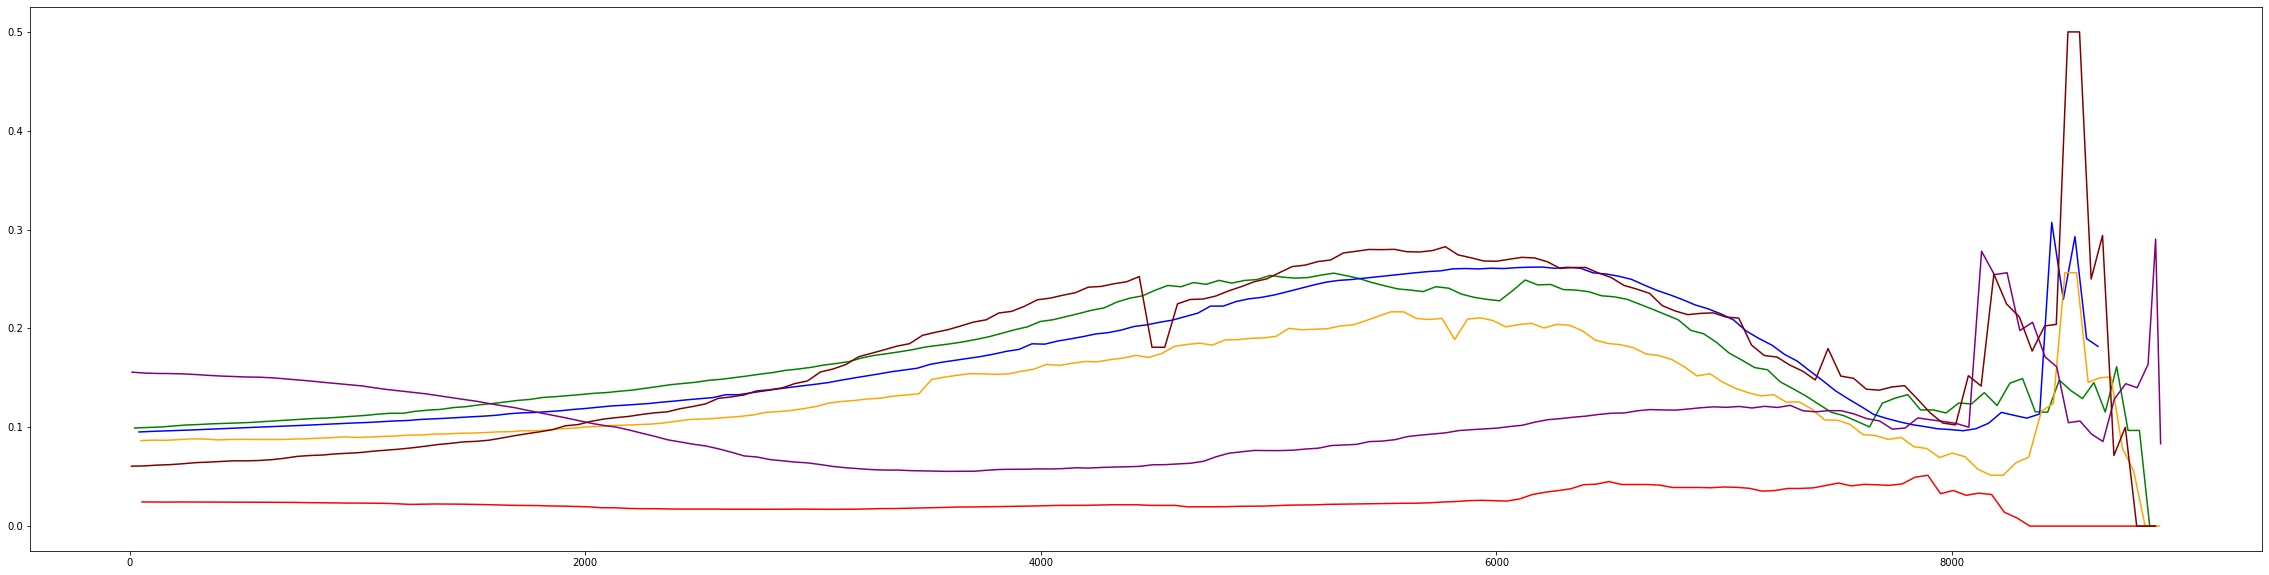

In [72]:
md['prcnt_pos'].plot(figsize=(40,10), color="green")
pa['prcnt_pos'].plot(figsize=(40,10), color="blue")
va['prcnt_pos'].plot(figsize=(40,10), color="orange")
wv['prcnt_pos'].plot(figsize=(40,10), color="red")
fl['prcnt_pos'].plot(figsize=(40,10), color="purple")
dc['prcnt_pos'].plot(figsize=(40,10), color="maroon")

##US


In [73]:
explore(us)
us.head()

date                         0
states                       0
positive                     0
negative                     0
pending                     42
hospitalizedCurrently       55
hospitalizedCumulative      42
inIcuCurrently              64
inIcuCumulative             63
onVentilatorCurrently       63
onVentilatorCumulative      70
recovered                   63
dateChecked                  0
death                       35
hospitalized                42
lastModified                 0
total                        0
totalTestResults             0
posNeg                       0
deathIncrease                0
hospitalizedIncrease         0
negativeIncrease             0
positiveIncrease             0
totalTestResultsIncrease     0
hash                         0
dtype: int64
None
Shape:  (204, 25)
               date      states  ...  positiveIncrease  totalTestResultsIncrease
count  2.040000e+02  204.000000  ...        204.000000                204.000000
mean   2.020047e+07   44.00

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200812,56,5172509,58558796,4174.0,47954.0,340117.0,9553.0,15524.0,2604.0,1629.0,1755225.0,2020-08-12T00:00:00Z,157776.0,340117.0,2020-08-12T00:00:00Z,63735479,63731305,63731305,1503,3055,423013,56035,479048,79b3e1ce5eebf15ea4b0409646d5753c9190fdbb
1,20200811,56,5116474,58135783,4118.0,48500.0,337062.0,9136.0,15331.0,2415.0,1612.0,1714960.0,2020-08-11T00:00:00Z,156273.0,337062.0,2020-08-11T00:00:00Z,63256375,63252257,63252257,1326,2715,683489,55594,739083,4b53c5c61a1b558e1b41cc8e6327f7359c17b4b1
2,20200810,56,5060880,57452294,3966.0,48612.0,334347.0,9216.0,15158.0,2533.0,1592.0,1670755.0,2020-08-10T00:00:00Z,154947.0,334347.0,2020-08-10T00:00:00Z,62517140,62513174,62513174,426,1654,674422,41807,716229,80e59c48dcdce8c0fa8760d93a4d1bf0c1a58c35
3,20200809,56,5019073,56777872,3871.0,49048.0,332693.0,9303.0,15081.0,2507.0,1578.0,1656888.0,2020-08-09T00:00:00Z,154521.0,332693.0,2020-08-09T00:00:00Z,61800816,61796945,61796945,616,838,661522,51319,712841,83d72910d9f712693eee3f8ca13182a53c81547a
4,20200808,56,4967754,56116350,3888.0,50016.0,331855.0,9652.0,15024.0,2566.0,1561.0,1643142.0,2020-08-08T00:00:00Z,153905.0,331855.0,2020-08-08T00:00:00Z,61087992,61084104,61084104,1089,1431,614455,54091,668546,b538b3af9fdc175ec448e61facfd4b323fa32452


In [74]:
us.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200812,56,5172509,58558796,4174.0,47954.0,340117.0,9553.0,15524.0,2604.0,1629.0,1755225.0,2020-08-12T00:00:00Z,157776.0,340117.0,2020-08-12T00:00:00Z,63735479,63731305,63731305,1503,3055,423013,56035,479048,79b3e1ce5eebf15ea4b0409646d5753c9190fdbb
1,20200811,56,5116474,58135783,4118.0,48500.0,337062.0,9136.0,15331.0,2415.0,1612.0,1714960.0,2020-08-11T00:00:00Z,156273.0,337062.0,2020-08-11T00:00:00Z,63256375,63252257,63252257,1326,2715,683489,55594,739083,4b53c5c61a1b558e1b41cc8e6327f7359c17b4b1
2,20200810,56,5060880,57452294,3966.0,48612.0,334347.0,9216.0,15158.0,2533.0,1592.0,1670755.0,2020-08-10T00:00:00Z,154947.0,334347.0,2020-08-10T00:00:00Z,62517140,62513174,62513174,426,1654,674422,41807,716229,80e59c48dcdce8c0fa8760d93a4d1bf0c1a58c35
3,20200809,56,5019073,56777872,3871.0,49048.0,332693.0,9303.0,15081.0,2507.0,1578.0,1656888.0,2020-08-09T00:00:00Z,154521.0,332693.0,2020-08-09T00:00:00Z,61800816,61796945,61796945,616,838,661522,51319,712841,83d72910d9f712693eee3f8ca13182a53c81547a
4,20200808,56,4967754,56116350,3888.0,50016.0,331855.0,9652.0,15024.0,2566.0,1561.0,1643142.0,2020-08-08T00:00:00Z,153905.0,331855.0,2020-08-08T00:00:00Z,61087992,61084104,61084104,1089,1431,614455,54091,668546,b538b3af9fdc175ec448e61facfd4b323fa32452
